In [1]:
path = "/home/ziran/se3/EFEM/data/ShapeNetV1_SDF/03797390/1a1c0a8d4bad82169f0594e65f756cf5/pointcloud.npz"
import numpy as np

# 加载 .npz 文件
data = np.load(path)
# 查看文件中的内容
print("Keys in the NPZ file:", data.files)

# 检查每个键的数据类型和形状
for key in data.files:
    print(f"Key: {key}")
    print("Data type:", type(data[key]))
    print("Shape:", data[key].shape)
    print("---")


Keys in the NPZ file: ['points', 'normals', 'scale', 'loc']
Key: points
Data type: <class 'numpy.ndarray'>
Shape: (100106, 3)
---
Key: normals
Data type: <class 'numpy.ndarray'>
Shape: (100106, 3)
---
Key: scale
Data type: <class 'numpy.ndarray'>
Shape: ()
---
Key: loc
Data type: <class 'numpy.ndarray'>
Shape: (3,)
---


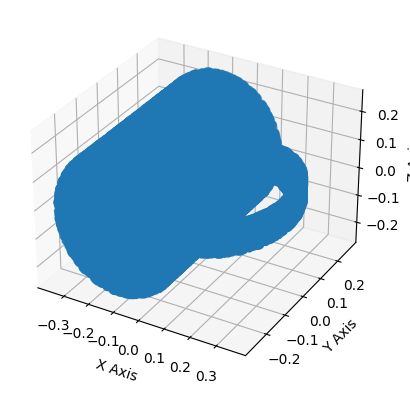

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 加载数据
points = data['points']

# 随机选取点云的一个子集
# 例如，选取总点数的 10%
sample_size = int(len(points) * 0.3)
indices = np.random.choice(len(points), sample_size, replace=False)
points = points[indices]

# 创建 3D 图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制点云
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# 设置坐标轴标签
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# 显示图形
plt.show()

In [3]:
len(points) 

30031

In [4]:
import open3d as o3d
import numpy as np

# 加载点云数据
point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(points)

# 可选：估算法线
point_cloud.estimate_normals()

# 使用泊松表面重建创建网格
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(point_cloud, depth=9)[0]

# 保存网格为 OBJ 文件
o3d.io.write_triangle_mesh("output_mesh.obj", mesh)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


True

In [4]:
import pyvista as pv
import numpy as np

# 加载点云数据
points = data['points']

# 创建 PyVista 点云对象
point_cloud = pv.PolyData(points)

# 应用表面重建算法，例如通过 Ball Pivoting
# 使用点的数量来确定邻域大小
nbr_sz = int(len(points) / 100)  # 或者选择其他适当的整数值
mesh = point_cloud.reconstruct_surface(nbr_sz)

# 保存网格为 OBJ 文件
mesh.save('output_mesh.obj')


NameError: name 'data' is not defined

In [3]:
import pybullet as p
import time

p.connect(p.DIRECT)  # 或 p.GUI，视您的需求而定

# plane_id = p.loadURDF("plane.urdf")  # 直接加载标准平面模型




# 加载您刚刚创建的 URDF 文件
mesh_id = p.loadURDF("mesh.urdf")

# 接下来是您的其他 PyBullet 代码...


# 放置网格
position = [0, 0, 0] # 可以根据需要调整位置
orientation = p.getQuaternionFromEuler([0, 0, 0]) # 旋转
scale = 1.0 # 可以根据需要调整缩放
p.createMultiBody(baseMass=0, baseCollisionShapeIndex=mesh_id, basePosition=position, baseOrientation=orientation)

# 简单的模拟循环
for i in range (10000):
    p.stepSimulation()
    time.sleep(1./240.)

p.disconnect()


b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_link

## use multi camera

In [2]:
import pybullet as p
import numpy as np
from multi_camera import MultiCamera




p.connect(p.DIRECT)  # 或 p.GUI，视您的需求而定

# plane_id = p.loadURDF("plane.urdf")  # 直接加载标准平面模型

# 加载您刚刚创建的 URDF 文件
mesh_id = p.loadURDF("mesh.urdf")



# 初始化相机视图
cam_yaws = [-30, 10, 50, 90, 130, 170, 210]
cam_pitches = [-70, -10, -65, -40, -10, -25, -60]
cam_dist = 0.85
cam_target = np.array([0.35, 0, 0])

your_object_ids = 0
# 渲染图像
rendered_images = MultiCamera.render(
    sim=p,  # PyBullet 实例
    object_ids=[your_object_ids],  # 你加载的物体的ID列表
    cam_yaws=cam_yaws,
    cam_pitches=cam_pitches,
    cam_dist=cam_dist,
    cam_target=cam_target,
    views=[2],  # 选择要渲染的视图索引
    width=100,  # 图像宽度
    height=100  # 图像高度
)

# 获取渲染的图像
images = rendered_images['images']
# 可以进行进一步的处理或显示这些图像


b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_link

pybullet build time: May 28 2020 16:37:34
b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_linkPosition: (0.0, 0.0, 0.0) Orientation: (0.0, 0.0, 0.0, 1.0)
Position: (0.0, 0.0, 0.0) Orientation: (0.0, 0.0, 0.0, 1.0)
Position: (0.0, 0.0, 0.0) Orientation: (0.0, 0.0, 0.0, 1.0)
Position: (0.0, 0.0, 0.0) Orientation: (0.0, 0.0, 0.0, 1.0)
Position: (0.0, 0.0, 0.0) Orientation: (0.0, 0.0, 0.0, 1.0)
Position: (0.0, 0.0, 0.0) Orientation: (0.0, 0.0, 0.0, 1.0)
Position: (0.0, 0.0, 0.0) Orientation: (0.0, 0.0, 0.0, 1.0)
Position: (0.0, 0.0, 0.0) Orientation: (0.0, 0.0, 0.0, 1.0)
Position: (0.0, 0.0, 0.0) Orientation: (0.0, 0.0, 0.0, 1.0)
Position: (0.0, 0.0, 0.0) Orientation: (0.0, 0.0, 0.0, 1.0)
Position: (0.0, 0.0, 0.0) Orientation: (0.0, 0.0, 0.0, 1.0)
Position: (0.0, 0.0, 0.0) Orientation: (0.0

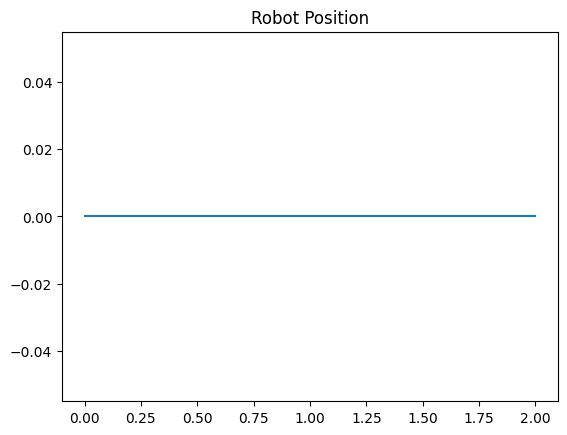

In [2]:
import pybullet as p
import pybullet_data
import time
import matplotlib.pyplot as plt
# 连接到PyBullet
physicsClient = p.connect(p.DIRECT)

# 加载URDF
p.setAdditionalSearchPath(pybullet_data.getDataPath())
robotId = p.loadURDF("mesh.urdf") # 替换为您的URDF文件名

# 简单的仿真循环
for i in range(1000):
    p.stepSimulation()
    # 获取机器人的位置和方向
    pos, ori = p.getBasePositionAndOrientation(robotId)
    print("Position:", pos, "Orientation:", ori)
    time.sleep(1./240.)
    # break

# 可视化（这里是一个简单的示例）
plt.plot(pos)
plt.title("Robot Position")
plt.show()

p.disconnect()


In [3]:
import trimesh
import ipyvolume as ipv

# 加载OBJ文件
mesh = trimesh.load('output_mesh.obj')
# 可视化网格
ipv.figure()
ipv.plot_trisurf(mesh.vertices[:,0], mesh.vertices[:,1], mesh.vertices[:,2], triangles=mesh.faces)
ipv.show()


/home/ziran/miniconda3/envs/pytorch3d/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…